## Model Definition

In [15]:
from keras.models import Sequential
from keras.utils.np_utils import to_categorical
from keras.layers import Dense, Activation, Dropout
from keras.callbacks import EarlyStopping, TensorBoard

import numpy as np

input_size = 9
drop_out = 0.2
first_dense_layer_nodes  = 256
second_dense_layer_nodes = 2

def get_model():
    
    model = Sequential()
    model.add(Dense(first_dense_layer_nodes, input_dim=input_size))
    model.add(Activation('relu'))
    model.add(Dropout(drop_out))
    model.add(Dense(second_dense_layer_nodes))
    model.add(Activation('softmax'))
    model.summary()
    
    model.compile(optimizer='rmsprop',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model

# <font color='blue'>Creating Training and Testing Datafiles</font>

In [16]:
import pandas as pd
import numpy as np

concatenated_HO = pd.read_csv('concatenated_HumanObserved-Features-Data.csv')
subtracted_HO = pd.read_csv('subtracted_HumanObserved-Features-Data.csv')

X_concatenated_HO = concatenated_HO.iloc[:,2:20]
X_concatenated_HO = np.array(X_concatenated_HO.values)

Y_concatenated_HO = concatenated_HO.iloc[:,-1:]
Y_concatenated_HO = np.array(Y_concatenated_HO.values)
Y_concatenated_HO1 = to_categorical(Y_concatenated_HO)

X_subtracted_HO = subtracted_HO.iloc[:,2:11]
X_subtracted_HO = np.array(X_subtracted_HO.values)

Y_subtracted_HO = subtracted_HO.iloc[:,-1:]
Y_subtracted_HO = np.array(Y_subtracted_HO.values)
Y_subtracted_HO1 = to_categorical(Y_subtracted_HO)


# <font color='blue'>Creating Model</font>

In [17]:
model = get_model()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 256)               2560      
_________________________________________________________________
activation_7 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 2)                 514       
_________________________________________________________________
activation_8 (Activation)    (None, 2)                 0         
Total params: 3,074
Trainable params: 3,074
Non-trainable params: 0
_________________________________________________________________


# <font color = blue>Run Model</font>

In [18]:
validation_data_split = 0.2
num_epochs = 1000
model_batch_size = 128
tb_batch_size = 32
early_patience = 100

tensorboard_cb   = TensorBoard(log_dir='logs', batch_size= tb_batch_size, write_graph= True)
earlystopping_cb = EarlyStopping(monitor='val_loss', verbose=1, patience=early_patience, mode='min')



history = model.fit(X_subtracted_HO 
                    , Y_subtracted_HO1
                    , validation_split=validation_data_split
                    , epochs=num_epochs
                    , batch_size=model_batch_size
                    , callbacks = [tensorboard_cb,earlystopping_cb]
                   )

Train on 1265 samples, validate on 317 samples
Epoch 1/100
1265/1265 [==============================] - 0s 131us/step - loss: 0.7131 - acc: 0.5043 - val_loss: 0.6913 - val_acc: 0.5237
Epoch 2/100
1265/1265 [==============================] - 0s 12us/step - loss: 0.7038 - acc: 0.4972 - val_loss: 0.6888 - val_acc: 0.5205
Epoch 3/100
1265/1265 [==============================] - 0s 15us/step - loss: 0.6950 - acc: 0.5439 - val_loss: 0.6981 - val_acc: 0.4763
Epoch 4/100
1265/1265 [==============================] - 0s 13us/step - loss: 0.6951 - acc: 0.5273 - val_loss: 0.7055 - val_acc: 0.4826
Epoch 5/100
1265/1265 [==============================] - 0s 12us/step - loss: 0.6922 - acc: 0.5423 - val_loss: 0.6947 - val_acc: 0.5142
Epoch 6/100
1265/1265 [==============================] - 0s 14us/step - loss: 0.6893 - acc: 0.5534 - val_loss: 0.6893 - val_acc: 0.5584
Epoch 7/100
1265/1265 [==============================] - 0s 14us/step - loss: 0.6834 - acc: 0.5628 - val_loss: 0.6909 - val_acc: 0.5647


1265/1265 [==============================] - 0s 12us/step - loss: 0.6316 - acc: 0.6482 - val_loss: 0.6992 - val_acc: 0.5394
Epoch 61/100
1265/1265 [==============================] - 0s 12us/step - loss: 0.6363 - acc: 0.6332 - val_loss: 0.6945 - val_acc: 0.5647
Epoch 62/100
1265/1265 [==============================] - 0s 12us/step - loss: 0.6310 - acc: 0.6395 - val_loss: 0.6957 - val_acc: 0.5615
Epoch 63/100
1265/1265 [==============================] - 0s 11us/step - loss: 0.6332 - acc: 0.6506 - val_loss: 0.6982 - val_acc: 0.5584
Epoch 64/100
1265/1265 [==============================] - 0s 11us/step - loss: 0.6292 - acc: 0.6530 - val_loss: 0.6924 - val_acc: 0.5584
Epoch 65/100
1265/1265 [==============================] - 0s 10us/step - loss: 0.6303 - acc: 0.6427 - val_loss: 0.7037 - val_acc: 0.5363
Epoch 66/100
1265/1265 [==============================] - 0s 14us/step - loss: 0.6366 - acc: 0.6372 - val_loss: 0.6973 - val_acc: 0.5489
Epoch 67/100
1265/1265 [==============================

# <font color = blue>Training and Validation Graphs</font>

array([<matplotlib.axes._subplots.AxesSubplot object at 0xb23aec9b0>,
      dtype=object)

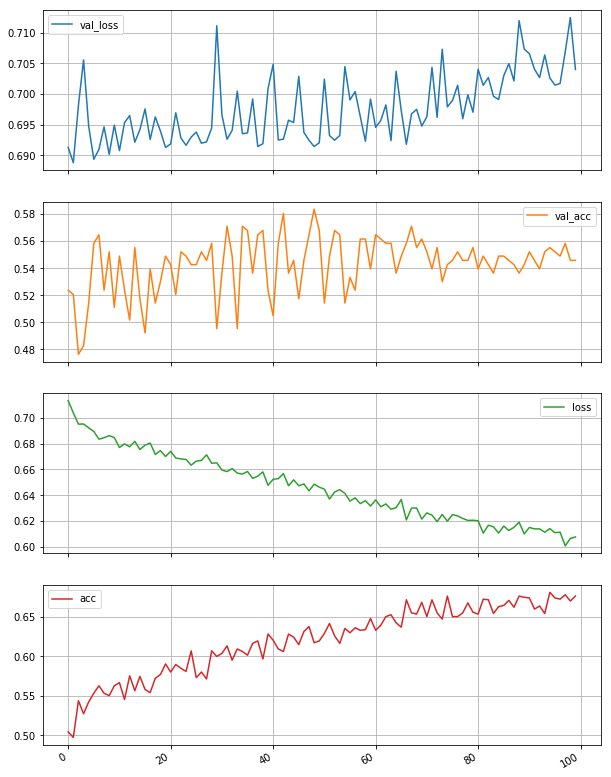

In [19]:
%matplotlib inline
df = pd.DataFrame(history.history)
df.plot(subplots=True, grid=True, figsize=(10,15))